# kd树


下面我们来介绍一下当数据量很大情况下，对于快速寻找k最近邻的算法——kd树。 


kd树(K-dimension tree)是一种对k维空间中的实例点进行存储以便对其进行快速检索的树形数据结构。

kd树是是一种二叉树，表示对k维空间的一个划分，构造kd树**相当于**（相当于只是为了方便的理解，在内存中都是以二叉树的形式存在）不断地用垂直于坐标轴的超平面将K维空间切分，构成一系列的K维超矩形区域。

kd树的每个结点对应于一个k维超矩形区域。利用kd树可以省去对大部分数据点的搜索，从而减少搜索的计算量。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/71954a44e239839b2d68bf33fbb1b075.png)

对一个三维空间，kd树按照一定的划分规则把这个三维空间划分了多个空间，如下图所示

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/8fb2a1cd41e1621e09f0df810d1dbd0f.png)


类比“二分查找”：给出一组数据：[9 1 4 7 2 5 0 3 8]，要查找8。

如果挨个查找（线性扫描），那么将会把数据集都遍历一遍。

而如果排一下序那数据集就变成了：[0 1 2 3 4 5 6 7 8 9]，按前一种方式我们进行了很多没有必要的查找，现在如果我们以5为分界点，那么数据集就被划分为了左右两个“簇” [0 1 2 3 4]和[6 7 8 9]。

因此，根本就没有必要进入第一个簇，可以直接进入第二个簇进行查找。

把二分查找中的数据点换成k维数据点，这样的划分就变成了用超平面对k维空间的划分。空间划分就是对数据点进行分类，“挨得近”的数据点就在一个空间里面。

构造kd树的方法如下：构造根结点，使根结点对应于K维空间中包含所有实例点的超矩形区域；

通过下面的递归的方法，不断地对k维空间进行切分，生成子结点。

在超矩形区域上选择一个坐标轴和在此坐标轴上的一个切分点，确定一个超平面，这个超平面通过选定的切分点并垂直于选定的坐标轴，将当前超矩形区域切分为左右两个子区域（子结点）；

这时，实例被分到两个子区域，这个过程直到子区域内没有实例时终止（终止时的结点为叶结点）。

在此过程中，将实例保存在相应的结点上。

通常，循环的择坐标轴对空间切分，选择训练实例点在坐标轴上的中位数为切分点，这样得到的kd树是平衡的（平衡二叉树：它是一棵空树，或其左子树和右子树的深度之差的绝对值不超过1，且它的左子树和右子树都是平衡二叉树）。　 


KD树中每个节点是一个向量，和二叉树按照数的大小划分不同的是，KD树每层需要选定向量中的某一维，然后根据这一维按左小右大的方式划分数据。

在构建KD树时，关键需要解决2个问题：

（1）选择向量的哪一维进行划分；

（2）如何划分数据。

第一个问题简单的解决方法可以是选择随机选择某一维或按顺序选择，**但是更好的方法应该是在数据比较分散的那一维进行划分（分散的程度可以根据方差来衡量）**。

好的划分方法可以使构建的树比较平衡，可以每次选择中位数来进行划分，这样问题2也得到了解决。

**构造平衡kd树算法：** 
　
输入：k维空间数据集$T={x_1,x_2,...,x_N}$，其中$xi=(x^{(1)}_i,x^{(2)}_i,...,x^{(k)}_i),i=1,2,...,N$;

输出：kd树

（1）开始：

构造根结点，根结点对应于包含$T$的k维空间的超矩形区域。选择$x^{(1)}$为坐标轴，以$T$中所有实例的$x^{(1)}$坐标的中位数为切分点，将根结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。由根结点生成深度为1的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域，右子结点对应于坐标$x^{(1)}$大于切分点的子区域。将落在切分超平面上的实例点保存在根结点。

（2）重复：

对深度为$j$的结点，选择$x^{(l)}$为切分的坐标轴，$l=j%k+1$，以该结点的区域中所有实例的$x^{(l)}$坐标的中位数为切分点，将该结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(l)}$垂直的超平面实现。由该结点生成深度为$j+1$的左、右子结点：左子结点对应坐标$x^{(l)}$小于切分点的子区域，右子结点对应坐标$x^{(l)}$大于切分点的子区域。将落在切分超平面上的实例点保存在该结点。


　下面用一个简单的2维平面上的例子来进行说明。

　　例. 给定一个二维空间数据集：$T={(2,3),(5,4),(9,6),(4,7),(8,1),(7,2)}$，构造一个平衡kd树。

　　解：
  
  根结点对应包含数据集$T$的矩形，选择$x^{(1)}$轴，6个数据点的$x^{(1)}$坐标中位数是6，这里选最接近的(7,2)点，以平面$x^{(1)}$=7将空间分为左、右两个子矩形（子结点）；
  
  接着左矩形以$x^{(2)}$=4分为两个子矩形（左矩形中{(2,3),(5,4),(4,7)}点的$x^{(2)}$坐标中位数正好为4），右矩形以$x^{(2)}$=6分为两个子矩形，如此递归，最后得到如下图所示的特征空间划分和kd树。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/ae1e00631e155be91c1fd6501c8437df.png)

下面的代码用递归的方式构建了kd树，通过前序遍历可以进行验证。

这里只是简单地采用坐标轮换方式选取分割轴，为了更高效的分割空间，也可以计算所有数据点在每个维度上的数值的方差，然后选择方差最大的维度作为当前节点的划分维度。

方差越大，说明这个维度上的数据越不集中（稀疏、分散），也就说明了它们就越不可能属于同一个空间，因此需要在这个维度上进行划分。

In [1]:
# kd-tree每个结点中主要包含的数据结构如下
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt  # k维向量节点(k维空间中的一个样本点)
        self.split = split  # 整数（进行分割维度的序号）
        self.left = left  # 该结点分割超平面左子空间构成的kd-tree
        self.right = right  # 该结点分割超平面右子空间构成的kd-tree


# 构建kd树
class KdTree(object):
    def __init__(self, data):
        k = len(data[0])  # 数据维度

        def CreateNode(split, data_set):  # 按第split维划分数据集exset创建KdNode
            if not data_set:  # 数据集为空
                return None
            # key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            # operator模块提供的itemgetter函数用于获取对象的哪些维的数据，参数为需要获取的数据在对象中的序号
            # data_set.sort(key=itemgetter(split)) # 按要进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2  # //为Python中的整数除法
            median = data_set[split_pos]  # 中位数分割点
            split_next = (split + 1) % k  # cycle coordinates

            # 递归的创建kd树
            return KdNode(median, split,
                          CreateNode(split_next, data_set[:split_pos]),  # 创建左子树
                          CreateNode(split_next, data_set[split_pos + 1:]))  # 创建右子树

        self.root = CreateNode(0, data)  # 从第0维分量开始构建kd树,返回根节点


# KDTree的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:  # 节点不为空
        preorder(root.left)
    if root.right:
        preorder(root.right)


if __name__ == "__main__":
    data = [[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]]
    kd = KdTree(data)
    preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


**搜索kd树**

　　利用kd树可以省去对大部分数据点的搜索，从而减少搜索的计算量。
  
  下面以搜索最近邻点为例加以叙述：给定一个目标点，搜索其最近邻，首先找到包含目标点的叶节点；
  
  然后从该叶结点出发，依次回退到父结点；不断查找与目标点最近邻的结点，当确定不可能存在更近的结点时终止。
  
  这样搜索就被限制在空间的局部区域上，效率大为提高。
　　


用kd树的最近邻搜索：

输入：已构造的kd树；目标点x； 

输出：x的最近邻。


（1） 在kd树中找出包含目标点x的叶结点：从根结点出发，递归的向下访问kd树。

若目标点当前维的坐标值小于切分点的坐标值，则移动到左子结点，否则移动到右子结点。直到子结点为叶结点为止；

（2） 以此叶结点为“当前最近点”；

（3） 递归的向上回退，在每个结点进行以下操作：

 - 　（a） 如果当前结点保存的实例点比“当前最近点”距目标点更近，则以该实例点为“当前最近点”，之前的最近实例点为“之前最近点”进行b步骤。否则继续向上回退。

 - 　（b）经过步骤a，当前节点已经是“当前最近点”了。既然我们是向上回退（向根节点回退），那么 “之前最近点”一定是在当前结点一个子结点对应的区域。
 
 -    检查当前节点的另一个子结点对应的区域是否有更近的点。具体的，检查另一个子结点对应的区域是否与以目标点为球心、以目标点与“当前最近点”间的距离为半径的超球体相交。如果相交，可能在另一个子结点对应的区域内存在距离目标更近的点，移动到另一个子结点。接着，递归的进行最近邻搜索。如果不相交，向上回退。

（4） 当回退到根结点时，搜索结束。最后的“当前最近点”即为x的最近邻点。

以先前构建好的kd树为例，查找目标点（3,4.5）的最近邻点。

同样先进行二叉查找，先从（7,2）查找到（5,4）节点，在进行查找时是由y = 4为分割超平面的，由于查找点为y值为4.5，因此进入右子空间查找到（4,7），形成搜索路径：（7,2）→（5,4）→（4,7），取（4,7）为当前最近邻点。

以目标查找点为圆心，目标查找点到当前最近点的距离2.69为半径确定一个红色的圆。

然后回溯到（5,4），计算其与查找点之间的距离为2.06，则该结点比当前最近点距目标点更近，以(5,4)为当前最近点。

用同样的方法再次确定一个绿色的圆，可见该圆和y = 4超平面相交，所以需要进入（5,4）结点的另一个子空间进行查找。

（2,3）结点与目标点距离为1.8，比当前最近点要更近，所以最近邻点更新为（2，3），最近距离更新为1.8，同样可以确定一个蓝色的圆。

接着根据规则回退到根结点(7,2)，蓝色圆与x=7的超平面不相交，因此不用进入（7,2）的右子空间进行查找。

至此，搜索路径回溯完，返回最近邻点（2,3），最近距离1.8。

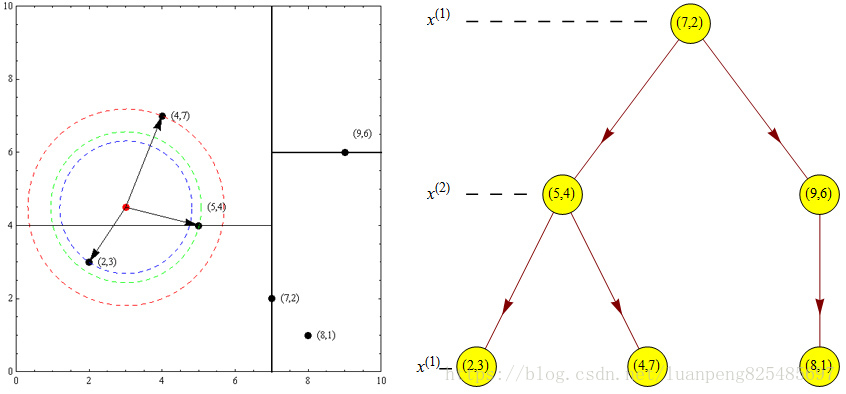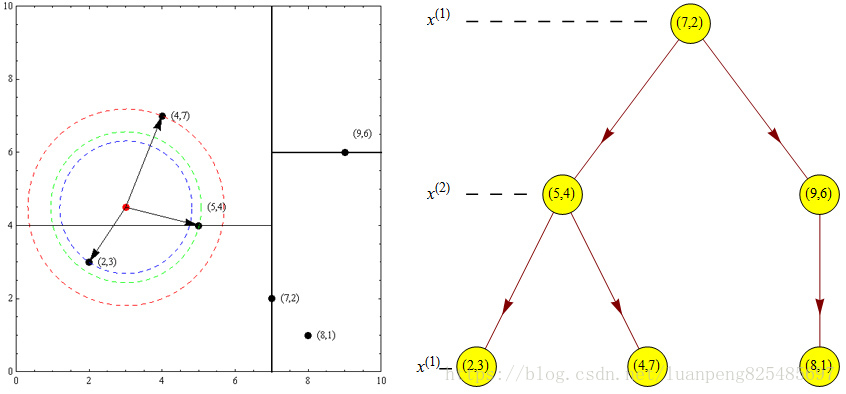

　如果实例点是随机分布的，kd树搜索的平均计算复杂度是O(logN)，这里N是训练实例数。kd树更适用于训练实例数远大于空间维数时的k近邻搜索。当空间维数接近训练实例数时，它的效率会迅速下降，几乎接近线性扫描。

下面的代码对构建好的kd树进行搜索，寻找与目标点最近的样本点：

In [2]:
# kd-tree每个结点中主要包含的数据结构如下
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt  # k维向量节点(k维空间中的一个样本点)
        self.split = split  # 整数（进行分割维度的序号）
        self.left = left  # 该结点分割超平面左子空间构成的kd-tree
        self.right = right  # 该结点分割超平面右子空间构成的kd-tree


# 构建kd树
class KdTree(object):
    def __init__(self, data):
        k = len(data[0])  # 数据维度

        def CreateNode(split, data_set):  # 按第split维划分数据集exset创建KdNode
            if not data_set:  # 数据集为空
                return None
            # key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            # operator模块提供的itemgetter函数用于获取对象的哪些维的数据，参数为需要获取的数据在对象中的序号
            # data_set.sort(key=itemgetter(split)) # 按要进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2  # //为Python中的整数除法
            median = data_set[split_pos]  # 中位数分割点
            split_next = (split + 1) % k  # cycle coordinates

            # 递归的创建kd树
            return KdNode(median, split,
                          CreateNode(split_next, data_set[:split_pos]),  # 创建左子树
                          CreateNode(split_next, data_set[split_pos + 1:]))  # 创建右子树

        self.root = CreateNode(0, data)  # 从第0维分量开始构建kd树,返回根节点


# KDTree的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:  # 节点不为空
        preorder(root.left)
    if root.right:
        preorder(root.right)


from math import sqrt
from collections import namedtuple

# 定义一个namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple("Result_tuple", "nearest_point  nearest_dist  nodes_visited")


def find_nearest(tree, point):
    k = len(point)  # 数据维度

    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"), 0)  # python中用float("inf")和float("-inf")表示正负无穷

        nodes_visited = 1

        s = kd_node.split  # 进行分割的维度
        pivot = kd_node.dom_elt  # 进行分割的“轴”

        if target[s] <= pivot[s]:  # 如果目标点第s维小于分割轴的对应值(目标离左子树更近)
            nearer_node = kd_node.left  # 下一个访问节点为左子树根节点
            further_node = kd_node.right  # 同时记录下右子树
        else:  # 目标离右子树更近
            nearer_node = kd_node.right  # 下一个访问节点为右子树根节点
            further_node = kd_node.left

        temp1 = travel(nearer_node, target, max_dist)  # 进行遍历找到包含目标点的区域

        nearest = temp1.nearest_point  # 以此叶结点作为“当前最近点”
        dist = temp1.nearest_dist  # 更新最近距离

        nodes_visited += temp1.nodes_visited

        if dist < max_dist:
            max_dist = dist  # 最近点将在以目标点为球心，max_dist为半径的超球体内

        temp_dist = abs(pivot[s] - target[s])  # 第s维上目标点与分割超平面的距离
        if max_dist < temp_dist:  # 判断超球体是否与超平面相交
            return result(nearest, dist, nodes_visited)  # 不相交则可以直接返回，不用继续判断

        # ----------------------------------------------------------------------
        # 计算目标点与分割点的欧氏距离
        temp_dist = sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(pivot, target)))

        if temp_dist < dist:  # 如果“更近”
            nearest = pivot  # 更新最近点
            dist = temp_dist  # 更新最近距离
            max_dist = dist  # 更新超球体半径

        # 检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist)

        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:  # 如果另一个子结点内存在更近距离
            nearest = temp2.nearest_point  # 更新最近点
            dist = temp2.nearest_dist  # 更新最近距离

        return result(nearest, dist, nodes_visited)

    return travel(tree.root, point, float("inf"))  # 从根节点开始递归


from time import clock
from random import random


# 产生一个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]


# 产生n个k维随机向量
def random_points(k, n):
    return [random_point(k) for _ in range(n)]


if __name__ == "__main__":
    data = [[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]]
    kd = KdTree(data)
    preorder(kd.root)

    ret = find_nearest(kd, [3, 4.5])
    print(ret)

    N = 400000
    t0 = clock()
    kd2 = KdTree(random_points(3, N))  # 构建包含四十万个3维空间样本点的kd树
    ret2 = find_nearest(kd2, [0.1, 0.5, 0.8])  # 四十万个样本点中寻找离目标最近的点
    t1 = clock()
    print("time: ", t1 - t0, "s")
    print(ret2)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]
Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)
time:  5.154704000000001 s
Result_tuple(nearest_point=[0.09955475545281889, 0.506590536469614, 0.8023496793641323], nearest_dist=0.007011020380681839, nodes_visited=58)
